In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ffffffffffffffffff/WhatsApp Image 2025-06-10 at 19.59.13_53986eb1.jpg
/kaggle/input/aaaaaaaaaaaaa/WhatsApp Image 2025-06-10 at 18.59.43_87a47765.jpg
/kaggle/input/qqqqqqqqqqq/WhatsApp Image 2025-06-09 at 19.53.39_4802444c.jpg
/kaggle/input/ffffffffffffffffffff/1000_F_254710222_3O9Lg0HVwbaBo6Pd6ssDs5Jy1n8NHtEA.jpg
/kaggle/input/ggggggggggg/WhatsApp Image 2025-06-10 at 19.59.13_d574b51d.jpg
/kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels/0000215_jpg.rf.b6922d2a6d7bdeff73a9e0338d657fa5.txt
/kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels/Image_170_jpg.rf.51beb7caf2ea64bcf2f56a401d4d2486.txt
/kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels/27994_png_jpg.rf.a081203883e1c94a641012174bd7399e.txt
/kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels/44-celebrities_oldfilter_jpg.rf.889bee8e7a62df8dba67334485e28eaa.txt
/kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels/0000257_jpg.rf.652e682d2e709b33121dd240f01e8008.txt
/kaggle/input/wrinkles2/Wrinkles/Wrink

In [2]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00:00:0100:01


In [3]:
from ultralytics import YOLO
import os
import shutil

# ================== 1. نقل البيانات ==================
source_dir = "/kaggle/input/wrinkles2/Wrinkles/Wrinkles"  # تأكد من المسار الصحيح
target_dir = "/kaggle/working/Wrinkles"
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# ================== 2. تعديل labels إلى class 0 ==================
for split in ["train", "valid", "test"]:
    labels_dir = os.path.join(target_dir, split, "labels")
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            path = os.path.join(labels_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()
            new_lines = ["0 " + " ".join(line.strip().split()[1:]) for line in lines]
            with open(path, "w") as f:
                f.write("\n".join(new_lines))

# ================== 3. إنشاء ملف data.yaml ==================
yaml_content = """
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid
test: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test

nc: 1
names: ["Wrinkles"]
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)

# ================== 4. تحميل YOLOv8m ==================
model = YOLO("yolov8m.pt")

# ================== 5. التدريب مع fine-tuning وتحسينات ==================
model.train(
    data="data.yaml",
    epochs=70,
    imgsz=640,
    batch=16,
    name="wrinkles_yolo_finetune",
    degrees=10,
    translate=0.2,
    scale=0.5,
    shear=1.5,
    flipud=0.4,
    fliplr=0.5,
    hsv_h=0.05,
    hsv_s=0.7,
    hsv_v=0.5,
    mosaic=0.8,
    mixup=0.2,
    close_mosaic=5,
    cos_lr=True,
    patience=15,
    cache=True,
    lr0=0.0005,
    lrf=0.01,
    warmup_epochs=2
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 237MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=5, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.4, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=wrinkles_yolo_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=True,

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.2 ms, read: 100.5±28.5 MB/s, size: 46.6 KB)


train: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/labels... 1262 images, 0 backgrounds, 831 corrupt: 100%|██████████| 1262/1262 [00:01<00:00, 1039.60it/s]

train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.2055158880349cef36eddef3663a0fd5.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.58529fda75f1b8c850e5e7f8b7679b77.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.a84107167a960de557a8e6b79d6bb25c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/00144_png_jpg.rf.ca4a9adb49ef0d65f921f0223a434637.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/00401_png_jpg.rf.26f49aabdf06cbbc23895e329cb6fdff.jpg: ignoring 

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 431/431 [00:00<00:00, 662.95it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 72.0±13.3 MB/s, size: 38.9 KB)


val: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels... 266 images, 0 backgrounds, 136 corrupt: 100%|██████████| 266/266 [00:00<00:00, 789.00it/s]

val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/0-3-_png_jpg.rf.284f5356a505818053f5ec57a5de58bc.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00142_png_jpg.rf.767af6369142d8fe643f437c442a9fa5.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00387_png_jpg.rf.b2e602c8b84f98192419ffa7ae0235a1.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00536_png_jpg.rf.6ce88242c1c6cd968b41a16400ee2490.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/01563_png_jpg.rf.842aef321fb4700f24ae090dfc19e77f.jpg: ign

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 130/130 [00:00<00:00, 410.42it/s]


Plotting labels to runs/detect/wrinkles_yolo_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/wrinkles_yolo_finetune
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      6.26G      2.231      2.803       2.37         92        640: 100%|██████████| 27/27 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        130        343      0.222      0.162     0.0741      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      6.35G      2.214      2.448      2.338         75        640: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:01<00:00,  2.49it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py:286: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        130        343    0.00954     0.0991    0.00213   0.000729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      6.32G      2.151      2.371      2.316         52        640: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py:286: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        130        343    0.00181     0.0845   0.000976   0.000246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.35G      2.239      2.479      2.381         95        640: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        130        343   0.000926     0.0175   0.000472   0.000117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      6.35G      2.126      2.409      2.289         83        640: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        130        343     0.0031      0.137    0.00143   0.000576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70       6.4G      2.231      2.486      2.338         71        640: 100%|██████████| 27/27 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343    0.00151      0.131   0.000869   0.000253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      6.39G      2.073      2.287      2.261        105        640: 100%|██████████| 27/27 [00:13<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        130        343     0.0169     0.0466    0.00361    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      6.38G      2.018      2.265      2.244         85        640: 100%|██████████| 27/27 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        130        343     0.0657     0.0788     0.0152    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      6.31G      1.988      2.248      2.251        103        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        130        343      0.113      0.157     0.0267     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.37G      2.018       2.24      2.256         84        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        130        343      0.401      0.175      0.151     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      6.38G      1.965      2.203      2.202         83        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        130        343      0.169       0.07     0.0565     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      6.38G      1.964      2.164      2.224         76        640: 100%|██████████| 27/27 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        343      0.473      0.157      0.168     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      6.28G      1.908      2.161      2.206         74        640: 100%|██████████| 27/27 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        343      0.537      0.175      0.185      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      6.37G      1.838      2.103      2.117         74        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.484      0.175      0.161     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70       6.4G      1.919      2.169      2.168         92        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.215      0.134      0.105     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      6.41G      1.816       1.99      2.095         64        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        130        343        0.8      0.184      0.229       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      6.31G      1.829      1.975       2.07         87        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        343      0.481      0.181      0.187      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70       6.4G      1.882       2.06      2.149         62        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        130        343      0.418       0.19      0.188      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       6.4G      1.908      2.086      2.156        102        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.507      0.152      0.167     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      6.38G       1.87      2.062      2.106         68        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343     0.0474     0.0875     0.0174    0.00963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      6.36G      1.847      1.993      2.079         57        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        130        343      0.438      0.212       0.22      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      6.38G      1.806      1.973      2.106         87        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.644      0.178      0.199      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      6.39G      1.795      1.975      2.086         67        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        130        343      0.533      0.216      0.233      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      6.38G      1.738      1.925      2.037        118        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        130        343      0.501      0.199      0.211      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      6.35G      1.811      1.977      2.078         57        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.717      0.169      0.188      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      6.36G       1.78      1.943      2.047         92        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        343      0.559      0.222      0.247      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      6.37G      1.803       1.95      2.064         89        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        343      0.684      0.183      0.233      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      6.37G      1.737      1.948      2.042         70        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        343      0.833      0.181      0.234      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      6.35G      1.759      1.958       2.04        101        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        343      0.585      0.204      0.255      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70       6.4G      1.774      1.931      2.022         81        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        343      0.599      0.207      0.238      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      6.41G      1.741      1.886      2.008         81        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.477      0.236      0.252      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      6.39G      1.726      1.852      2.006         72        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        130        343      0.563      0.233      0.273      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      6.29G      1.744      1.885      2.043         84        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.467      0.219       0.26      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70       6.4G      1.722      1.857      1.955         74        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.437       0.23      0.254      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      6.38G       1.75      1.817      2.023         86        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.561      0.245      0.293      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      6.41G      1.672      1.819      1.966         86        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        130        343      0.559      0.224      0.273      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      6.36G      1.721      1.882      2.018        117        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        343      0.382      0.274      0.268      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      6.37G      1.699      1.844      1.991         59        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        343      0.489      0.246      0.267      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70       6.4G      1.724      1.893      2.005         94        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        343      0.508      0.262      0.294       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      6.38G      1.633      1.766      1.929         65        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.434      0.265      0.273      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      6.35G      1.626      1.779      1.905         70        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343       0.46      0.256      0.286      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      6.39G      1.657      1.788      1.941         70        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343      0.451      0.277      0.293      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      6.37G      1.651      1.738      1.938         78        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        130        343      0.425       0.28      0.278       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      6.42G       1.65      1.746      1.921         51        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        130        343      0.466      0.259      0.295      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      6.29G      1.619      1.727      1.921        100        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        130        343      0.438      0.271      0.297      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      6.41G      1.531      1.616      1.852         62        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        130        343       0.51      0.242      0.283      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70       6.4G      1.595       1.71      1.917         81        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343      0.542      0.271      0.309      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      6.38G      1.596      1.717      1.903         89        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.444      0.298       0.33      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      6.29G      1.565      1.672      1.873         61        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.509      0.271        0.3      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      6.37G      1.651       1.79      1.958         79        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        130        343      0.474      0.274      0.314      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      6.39G      1.596      1.727      1.896        117        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343      0.463      0.277      0.302      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      6.38G      1.575      1.691      1.886         58        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.526      0.289      0.325      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70       6.3G       1.57      1.682      1.897         86        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.563      0.259      0.309      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70       6.4G      1.566      1.673       1.89         65        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.535      0.255       0.31      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70       6.4G      1.526      1.642      1.865         86        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.515      0.271      0.309      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      6.39G      1.566      1.678      1.894         96        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.459      0.294      0.323      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      6.31G      1.522      1.617      1.832         57        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.468      0.309      0.329      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      6.39G      1.518      1.653      1.837         63        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.476      0.303      0.327      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70       6.4G      1.538      1.634      1.864         75        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343      0.453      0.314      0.331      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      6.42G      1.556      1.658      1.873        119        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.456      0.281      0.326      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      6.33G      1.585      1.666      1.876         96        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.477      0.294      0.329      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      6.38G      1.547      1.648      1.868         55        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        130        343      0.537       0.28      0.335      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      6.38G      1.548      1.625      1.852        107        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343       0.47      0.303      0.326      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      6.38G      1.566       1.64       1.86         77        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        130        343      0.458      0.327      0.331      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      6.32G      1.541      1.675      1.851         70        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.443      0.324      0.334      0.185


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      6.37G      1.593      1.853      1.949         57        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.452      0.289      0.319      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      6.39G      1.531      1.764      1.917         26        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        343      0.459      0.285       0.32      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      6.39G      1.578      1.724      1.961         46        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        130        343      0.479      0.289      0.325      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      6.33G      1.585      1.719      1.944         26        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        343      0.486      0.283      0.328      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      6.39G      1.536       1.65      1.906         48        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        343      0.495      0.292       0.33      0.186



70 epochs completed in 0.335 hours.
Optimizer stripped from runs/detect/wrinkles_yolo_finetune/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/wrinkles_yolo_finetune/weights/best.pt, 52.0MB

Validating runs/detect/wrinkles_yolo_finetune/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        130        343      0.535      0.277      0.336      0.189
Speed: 0.2ms preprocess, 11.1ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/wrinkles_yolo_finetune


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785918d05f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [4]:
# ================== 6. حفظ أفضل نسخة من النموذج ==================
best_model_path = "runs/detect/wrinkles_yolo_finetune/weights/best.pt"
shutil.copy(best_model_path, "/kaggle/working/best_model_wrinkles.pt")

# ================== 7. التنبؤ على test images (TTA + threshold) ==================
model = YOLO("/kaggle/working/best_model_wrinkles.pt")
results = model.predict(
    source="/kaggle/working/Wrinkles/test/images",
    conf=0.2,
    augment=True,  # TTA
    save=True
)



image 1/113 /kaggle/working/Wrinkles/test/images/0000177_jpg.rf.df14cb1e1ed5c0a3454d8aaa0711f565.jpg: 640x640 1 Wrinkles, 122.3ms
image 2/113 /kaggle/working/Wrinkles/test/images/0000194_jpg.rf.b1249abf84dbefeae0b584069ad38bd6.jpg: 640x640 1 Wrinkles, 64.4ms
image 3/113 /kaggle/working/Wrinkles/test/images/0000195_jpg.rf.74f3f1d34fa05b2871bf486d70a766f9.jpg: 640x640 3 Wrinkless, 64.4ms
image 4/113 /kaggle/working/Wrinkles/test/images/0000198_jpg.rf.cfeb6230178181858f723d3d84c080f0.jpg: 640x640 1 Wrinkles, 61.9ms
image 5/113 /kaggle/working/Wrinkles/test/images/0000222_jpg.rf.540824492f4c7c1fc52d226bf67c7756.jpg: 640x640 1 Wrinkles, 54.7ms
image 6/113 /kaggle/working/Wrinkles/test/images/0000237_jpg.rf.d3c5ad5a10cbe2eb50b770ed3393900a.jpg: 640x640 1 Wrinkles, 55.1ms
image 7/113 /kaggle/working/Wrinkles/test/images/0000242_jpg.rf.122ed50a2b32675423df65f1ab42aa23.jpg: 640x640 1 Wrinkles, 54.3ms
image 8/113 /kaggle/working/Wrinkles/test/images/0000254_jpg.rf.9c13531d70afb412219d2cc732e965


image 1/1 /kaggle/input/jjjjjjjkk/e17583a02a287c31d6a16e486b869287.jpg: 640x640 1 Wrinkles, 36.9ms
Speed: 2.5ms preprocess, 36.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict14


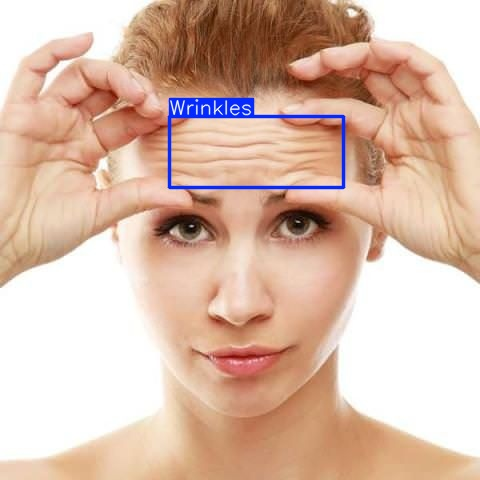

In [21]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# تحميل أفضل نموذج تم تدريبه
model = YOLO("/kaggle/working/best_model_wrinkles.pt")

# التنبؤ على صورة اختبار
results = model.predict(
    source="/kaggle/input/jjjjjjjkk/e17583a02a287c31d6a16e486b869287.jpg",
    conf=0.2,
    iou=0.5,
    save=True,
    show_conf=False,     # إخفاء النسبة المئوية
    show_labels=True     # عرض اسم الكلاس "Acne" (غيّره لـ False لو مش عايزه يظهر)
)

# عرض النتيجة
output_dir = results[0].save_dir
image_files = [f for f in os.listdir(output_dir) if f.endswith((".jpg", ".jpeg", ".png"))]

if image_files:
    display(Image(filename=os.path.join(output_dir, image_files[0])))
else:
    print("❌ لم يتم العثور على صورة ناتجة.")


In [19]:
from ultralytics import YOLO

# تحميل أفضل نموذج
model = YOLO("/kaggle/working/best_model_wrinkles.pt")  # أو أي مسار لنموذجك

# تقييم النموذج على مجموعة الـ validation أو test
metrics = model.val(
    data="data.yaml",    # نفس ملف الداتا المستخدم في التدريب
    split="test",        # أو "val" لو عايز تستخدم مجموعة التحقق
    iou=0.5,
    conf=0.25,
    plots=True           # يرسم لك confusion matrix ونتائج إضافية
)

# طباعة النتائج
print(metrics.results_dict)


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 1.3±0.3 ms, read: 88.4±35.7 MB/s, size: 38.2 KB)


val: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/labels... 113 images, 0 backgrounds, 47 corrupt: 100%|██████████| 113/113 [00:00<00:00, 617.34it/s]

val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images/1-2-_jpg.rf.5a0534bb1ed48402eecfc4272e3f77db.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images/10_jpg.rf.121aa63d5b1f182d5ca3cb853f5e77af.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images/11_jpg.rf.01df45d99d895bceb5b79993d0a1376e.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images/18_jpeg.rf.3a06a125db299df547ac4c9e0909584c.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images/19_jpg.rf.b7ae4d1f3f2dd279b73e8b06000abee2.jpg: ignoring corrupt image/label: Label class


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         66        163      0.807      0.282       0.56      0.428
Speed: 3.9ms preprocess, 23.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
{'metrics/precision(B)': 0.8070175438596491, 'metrics/recall(B)': 0.2822085889570552, 'metrics/mAP50(B)': 0.5597046705994602, 'metrics/mAP50-95(B)': 0.42823203331563714, 'fitness': 0.44137929704401946}


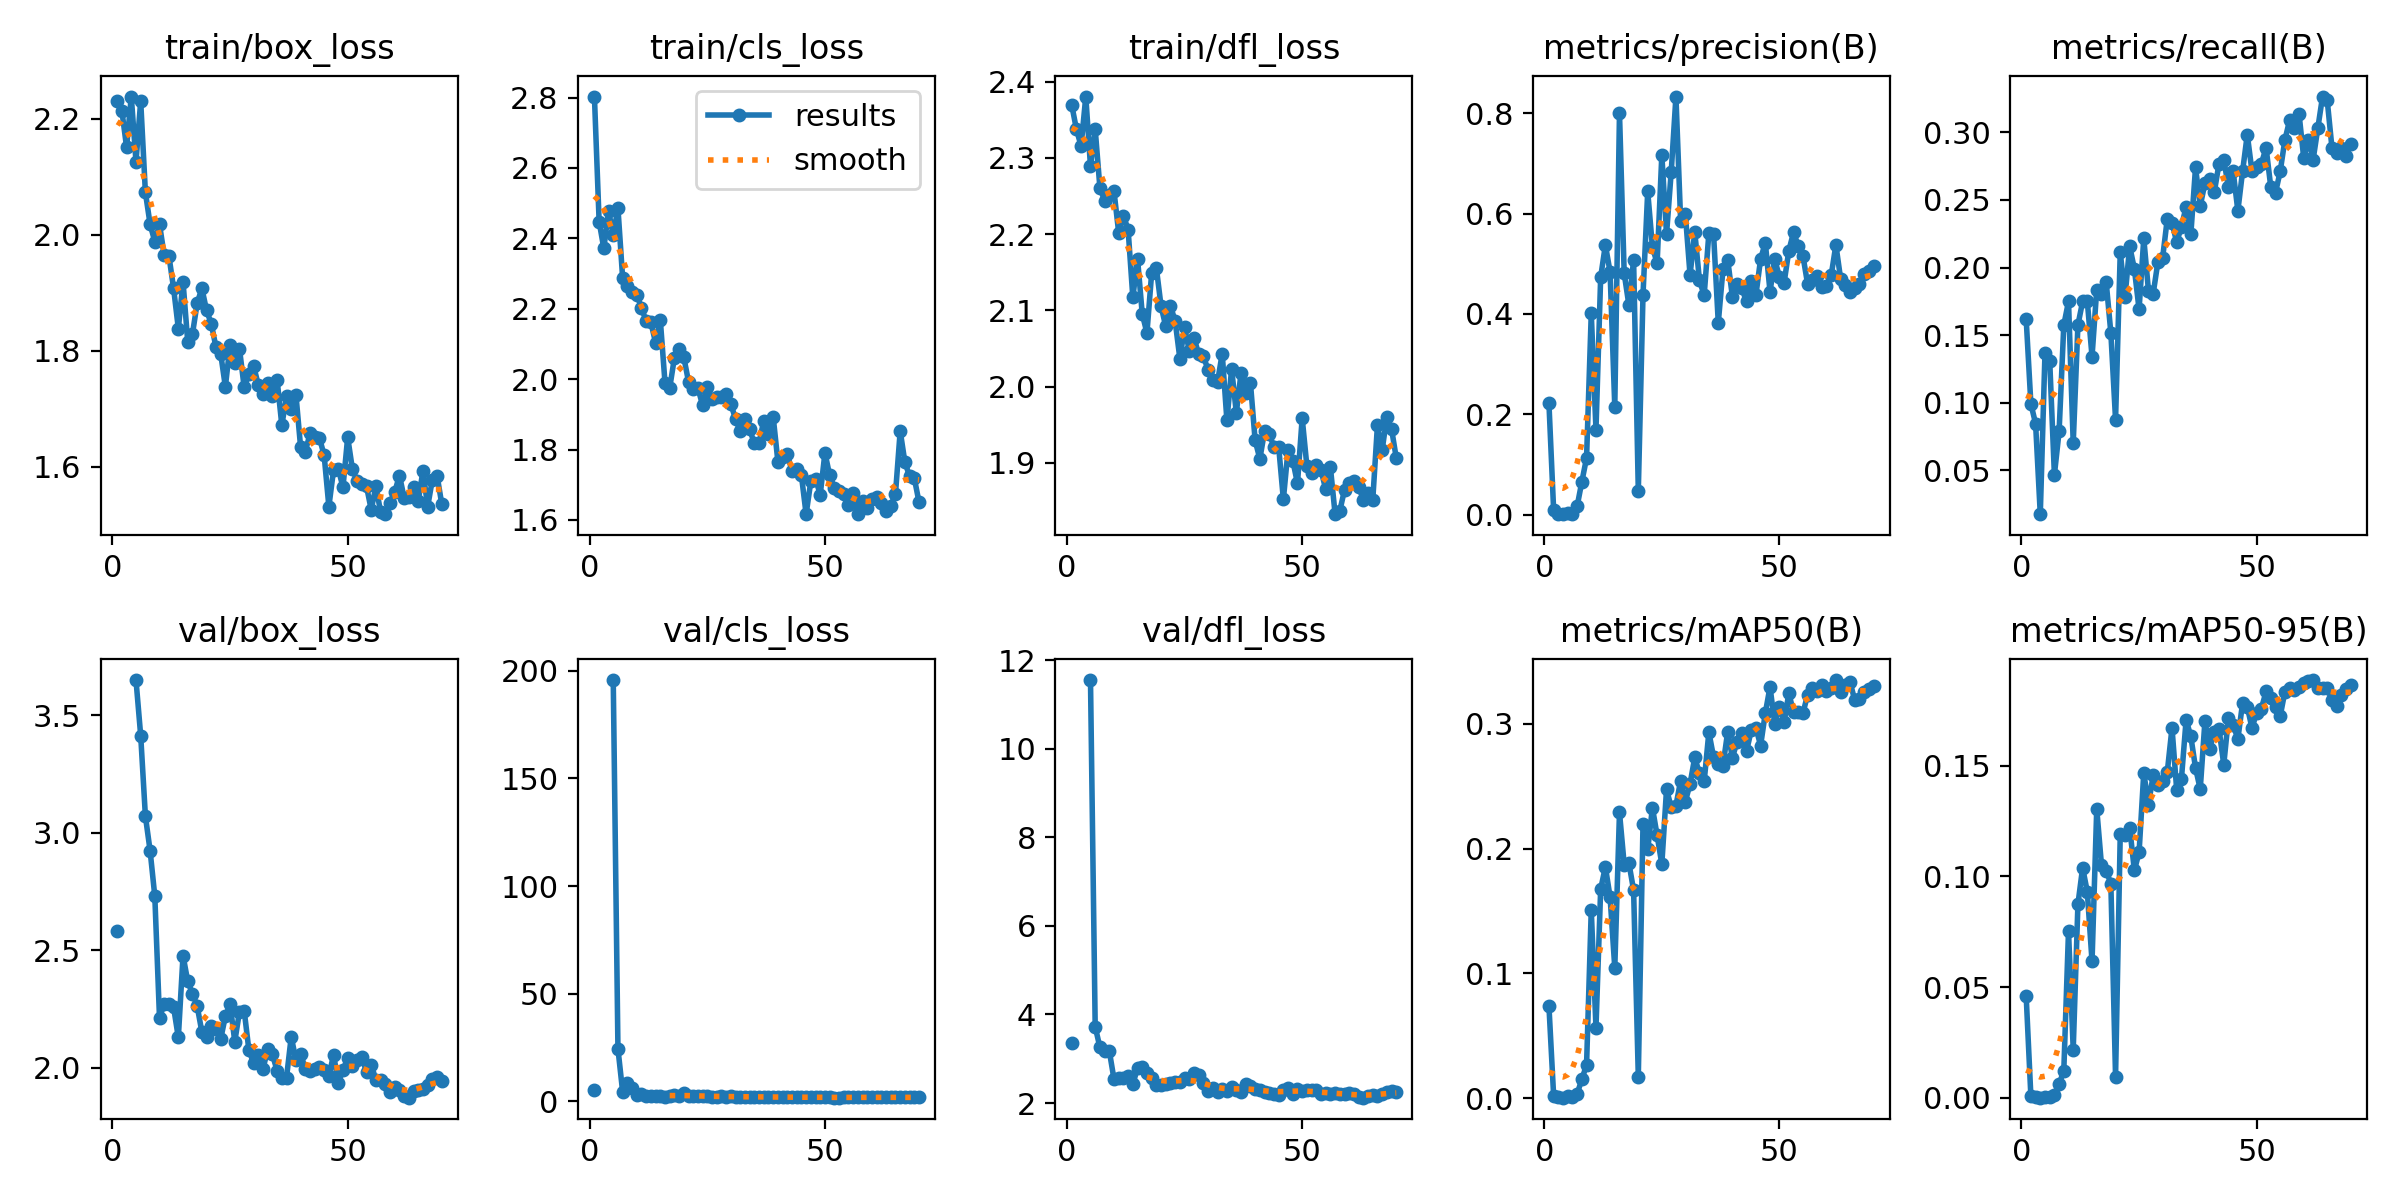

In [25]:
from IPython.display import Image, display

# Displaying the training and evaluation curves
results_path = "/kaggle/working/runs/detect/wrinkles_yolo_finetune/results.png"
display(Image(filename=results_path))


0: 640x640 (no detections), 22.0ms
1: 640x640 1 Wrinkles, 22.0ms
2: 640x640 (no detections), 22.0ms
3: 640x640 (no detections), 22.0ms
4: 640x640 1 Wrinkles, 22.0ms
5: 640x640 1 Wrinkles, 22.0ms
6: 640x640 3 Wrinkless, 22.0ms
7: 640x640 (no detections), 22.0ms
8: 640x640 (no detections), 22.0ms
9: 640x640 1 Wrinkles, 22.0ms
10: 640x640 2 Wrinkless, 22.0ms
11: 640x640 (no detections), 22.0ms
12: 640x640 1 Wrinkles, 22.0ms
13: 640x640 1 Wrinkles, 22.0ms
14: 640x640 1 Wrinkles, 22.0ms
15: 640x640 1 Wrinkles, 22.0ms
16: 640x640 3 Wrinkless, 22.0ms
17: 640x640 3 Wrinkless, 22.0ms
18: 640x640 (no detections), 22.0ms
19: 640x640 1 Wrinkles, 22.0ms
20: 640x640 (no detections), 22.0ms
21: 640x640 (no detections), 22.0ms
22: 640x640 1 Wrinkles, 22.0ms
23: 640x640 1 Wrinkles, 22.0ms
24: 640x640 2 Wrinkless, 22.0ms
25: 640x640 (no detections), 22.0ms
26: 640x640 3 Wrinkless, 22.0ms
27: 640x640 (no detections), 22.0ms
28: 640x640 (no detections), 22.0ms
29: 640x640 3 Wrinkless, 22.0ms
30: 640x640 

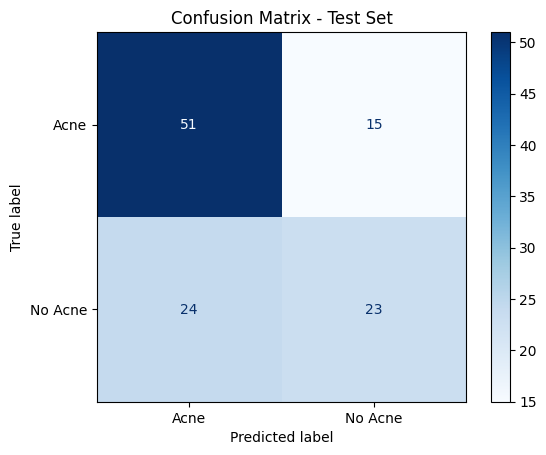

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/labels")
image_files = list(Path("/kaggle/input/wrinkles2/Wrinkles/Wrinkles/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Acne", "No Acne"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [2]:
# import os
# import shutil

# # نسخ البيانات من input إلى working
# source_dir = "/kaggle/input/wrinkles2/Wrinkles/Wrinkles"
# target_dir = "/kaggle/working/Wrinkles"

# shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# # تعديل ملفات labels لتحويل class إلى 0
# for split in ["train", "valid", "test"]:
#     labels_dir = os.path.join(target_dir, split, "labels")
#     for filename in os.listdir(labels_dir):
#         if filename.endswith(".txt"):
#             path = os.path.join(labels_dir, filename)
#             with open(path, "r") as f:
#                 lines = f.readlines()

#             new_lines = []
#             for line in lines:
#                 parts = line.strip().split()
#                 parts[0] = "0"  # كلهم نفس الكلاس
#                 new_lines.append(" ".join(parts))

#             with open(path, "w") as f:
#                 f.write("\n".join(new_lines))


In [3]:
data_yaml = """
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images

nc: 1
names: ["Wrinkles"]
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)


In [4]:
!pip install ultralytics --quiet
from ultralytics import YOLO

# تحميل موديل YOLOv8
model = YOLO("yolov8m.pt")

# تدريب النموذج
model.train(
    data="data.yaml",
    epochs=100,
    imgsz=832,
    batch=16,
    name="wrinkles_yolo_v2",
    patience=50,
    lr0=0.001,  # Learning rate مبدئي
    warmup_epochs=3,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.2,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    flipud=0.5,
    fliplr=0.5
)


# تقييم الأداء
results = model.val()
print(results)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.5 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

100%|██████████| 49.7M/49.7M [00:00<00:00, 221MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.2, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=832, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=wrinkles_yolo_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.9 ms, read: 38.0±7.7 MB/s, size: 46.6 KB)


train: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/labels... 1262 images, 0 backgrounds, 831 corrupt: 100%|██████████| 1262/1262 [00:02<00:00, 480.77it/s]

train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.2055158880349cef36eddef3663a0fd5.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.58529fda75f1b8c850e5e7f8b7679b77.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/0-1-_jpg.rf.a84107167a960de557a8e6b79d6bb25c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/00144_png_jpg.rf.ca4a9adb49ef0d65f921f0223a434637.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/train/images/00401_png_jpg.rf.26f49aabdf06cbbc23895e329cb6fdff.jpg: ignoring 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.3±0.2 ms, read: 18.5±12.0 MB/s, size: 27.0 KB)


val: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels... 266 images, 0 backgrounds, 136 corrupt: 100%|██████████| 266/266 [00:00<00:00, 434.30it/s]

val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/0-3-_png_jpg.rf.284f5356a505818053f5ec57a5de58bc.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00142_png_jpg.rf.767af6369142d8fe643f437c442a9fa5.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00387_png_jpg.rf.b2e602c8b84f98192419ffa7ae0235a1.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00536_png_jpg.rf.6ce88242c1c6cd968b41a16400ee2490.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/01563_png_jpg.rf.842aef321fb4700f24ae090dfc19e77f.jpg: ign

Plotting labels to runs/detect/wrinkles_yolo_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 832 train, 832 val
Using 2 dataloader workers
Logging results to runs/detect/wrinkles_yolo_v2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        10G      2.197      2.897      2.336         74        832: 100%|██████████| 27/27 [00:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        130        343    0.00649      0.198     0.0026   0.000894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        10G      1.998      2.308      2.189         72        832: 100%|██████████| 27/27 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py:286: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        130        343    0.00014    0.00875   4.56e-05   7.67e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.98G      2.077      2.482      2.347         72        832: 100%|██████████| 27/27 [00:25<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        130        343          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.94G      1.978       2.39      2.277         81        832: 100%|██████████| 27/27 [00:27<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        130        343    0.00504     0.0437   0.000932   0.000272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.99G      1.905        2.3      2.236         95        832: 100%|██████████| 27/27 [00:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343     0.0764     0.0525    0.00835    0.00237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.1G      1.911      2.258      2.233         72        832: 100%|██████████| 27/27 [00:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        130        343      0.131     0.0758     0.0178    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.1G      1.875      2.143      2.184         80        832: 100%|██████████| 27/27 [00:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.165      0.108     0.0362       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.1G      1.798      2.139      2.134         50        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.101     0.0758     0.0166    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        10G      1.683      2.027      2.044         49        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        130        343      0.484      0.148      0.115     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.1G      1.663      2.055      2.031         61        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        130        343      0.245     0.0583     0.0329     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.1G      1.697      2.002      2.077         76        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        130        343     0.0719     0.0933     0.0243     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        10G      1.653      1.989      2.029         66        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        130        343      0.298      0.105     0.0905     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        10G      1.638       1.92      2.027         75        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        130        343     0.0818       0.16      0.024    0.00892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.1G      1.602       1.85      1.966         73        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        130        343      0.472      0.108        0.1     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.1G      1.629      1.871       1.98         52        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.487      0.172      0.158     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.1G      1.672      1.892      2.012         79        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        130        343      0.438      0.152      0.137     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.95G       1.66      1.937      2.017         50        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        130        343      0.624      0.175      0.189      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.1G      1.547      1.834      1.965         66        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        130        343      0.335      0.134      0.119     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.1G      1.618      1.882      2.022         60        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.809      0.175      0.198      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.1G      1.676      1.942       2.04         80        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        130        343       0.58      0.187      0.201       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.93G      1.446      1.727      1.895         60        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        130        343      0.736      0.175      0.195      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.1G      1.545      1.801       1.91         78        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        130        343      0.681      0.187      0.215      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.1G      1.632      1.845      1.999        108        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343       0.77      0.169       0.19      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.1G      1.631      1.884      1.991         75        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        130        343      0.751      0.172      0.205      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        10G      1.488      1.715       1.89         71        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.762      0.175      0.213      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        10G      1.495      1.715      1.877         75        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343        0.7      0.169      0.204      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.1G      1.518      1.751      1.912        103        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343       0.75      0.178      0.222      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.1G       1.54      1.714      1.936         65        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.531       0.19      0.218       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        10G      1.442      1.652      1.845         68        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.383       0.23      0.223      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.1G      1.477      1.694      1.884         84        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        130        343      0.488       0.19      0.227      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.1G       1.47      1.707      1.853         56        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343       0.51      0.195      0.232       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.1G      1.464      1.692      1.864         58        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.561      0.213      0.243      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.99G      1.492      1.707      1.887         83        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        130        343      0.485      0.226      0.237      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.1G      1.561      1.797       1.92         72        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.703      0.186       0.24       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        10G      1.547      1.759      1.896         74        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.754      0.181      0.235      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.1G      1.453      1.662      1.863         88        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.516      0.196      0.245       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        10G      1.422      1.686       1.84         86        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.542      0.216      0.248      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.1G      1.422      1.659      1.826         63        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.516      0.242      0.267      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.96G      1.486      1.662      1.856         71        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.553       0.21      0.258       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.1G      1.361      1.593      1.775         62        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.608      0.222      0.269      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.99G      1.462      1.693      1.821         67        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.509      0.201      0.222      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.1G      1.406      1.668      1.811         85        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.571      0.222      0.272      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.1G      1.372      1.626      1.779         70        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.548      0.258      0.292      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.1G      1.326       1.57      1.782         74        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.553      0.251       0.29      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.92G      1.446      1.682      1.832         72        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.552      0.241      0.279      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        10G      1.372      1.555      1.757         85        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.561      0.242      0.284      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        10G      1.458       1.63      1.816         93        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.623      0.236      0.304      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.1G      1.435      1.615      1.813         68        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.563      0.251        0.3      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.98G      1.417      1.582        1.8         76        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.659      0.239      0.294      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        10G      1.357      1.506      1.747         92        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.588      0.238      0.299      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.1G       1.38       1.53      1.774         83        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.559      0.257      0.301      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.1G      1.366      1.537      1.786         46        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.537       0.23      0.299      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.98G      1.346      1.532      1.759         82        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.551      0.242      0.291      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.1G      1.415      1.606      1.797         83        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.522      0.226      0.252      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.1G      1.363       1.55       1.75         46        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343       0.57      0.271      0.302       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.1G      1.366      1.554      1.768         94        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.546      0.274      0.313      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        10G      1.343       1.51      1.761         41        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343      0.512      0.268      0.318      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.1G      1.287      1.474       1.72         64        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.515      0.265      0.313      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        10G      1.284      1.409       1.72         65        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.566      0.248      0.297      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.1G      1.336      1.495       1.75         60        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.585       0.23      0.275      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.98G       1.35      1.534      1.766         67        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343       0.62      0.216      0.284      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.1G      1.364      1.557      1.736         73        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.528      0.245      0.294      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.1G      1.362      1.527      1.742         51        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.619      0.271      0.317      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.1G      1.326        1.5      1.686         58        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.596      0.254      0.302      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.96G      1.303      1.425      1.704         58        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        130        343      0.631      0.265      0.324      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.1G       1.37      1.491      1.756         52        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.558      0.265      0.325      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.91G      1.353       1.51      1.728         70        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        130        343       0.63      0.259      0.327      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.1G      1.381      1.511      1.759         59        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343       0.52      0.265      0.319      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        10G      1.329      1.498      1.744         69        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.505      0.297      0.337      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.1G      1.334      1.488      1.724         87        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.558      0.257      0.303       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.1G      1.325      1.454      1.728         56        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.568      0.259      0.318      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        10G      1.234      1.365      1.661         81        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.535      0.296      0.331      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        10G      1.293      1.449      1.691         83        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.528      0.283      0.317      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        10G      1.287      1.443      1.706         69        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.542      0.277      0.332      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.1G      1.244      1.383      1.695         50        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.523        0.3      0.352      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.1G      1.266      1.422      1.686         67        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.504        0.3       0.35      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        10G      1.277      1.406      1.688         53        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.533      0.283      0.339      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.1G      1.318      1.464      1.686         64        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.548      0.292      0.349      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        10G      1.282      1.435      1.685         78        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.475      0.312      0.335      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        10G      1.306       1.43      1.691         74        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.577      0.294      0.354      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        10G      1.282      1.402      1.639         82        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.602      0.306      0.363      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.1G      1.226      1.344      1.655         77        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343       0.56      0.309      0.362      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        10G      1.303      1.399      1.689         71        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343       0.51      0.315      0.357       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.1G      1.251      1.349      1.673         79        832: 100%|██████████| 27/27 [00:29<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.519      0.283      0.341      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.96G      1.285      1.394      1.683         43        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.581        0.3      0.362      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.1G      1.237      1.325      1.677         53        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.603      0.292      0.363      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.1G      1.232      1.373      1.653         61        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.562      0.289      0.352      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.1G      1.271      1.366      1.659         64        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.545      0.315      0.374      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        10G      1.241      1.314      1.667         68        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343       0.54      0.297      0.356      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.1G      1.241      1.375      1.643         82        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.578      0.303      0.361      0.197


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        10G      1.598      1.793      1.902         53        832: 100%|██████████| 27/27 [00:30<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.603      0.305      0.356      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.3G      1.577      1.677      1.947         31        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.566      0.318       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.93G      1.533      1.654      1.916         39        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.588      0.297      0.371      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.1G      1.556      1.663      1.942         36        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343       0.57      0.309      0.374      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        10G      1.543       1.62      1.932         34        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.583      0.303      0.371        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.1G      1.541       1.63      1.901         53        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.564      0.321      0.373      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.95G      1.536      1.636      1.911         53        832: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343      0.534      0.324      0.372      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        10G      1.536      1.601      1.908         45        832: 100%|██████████| 27/27 [00:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        130        343       0.56      0.309      0.379      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        10G      1.518      1.592      1.879         53        832: 100%|██████████| 27/27 [00:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        130        343      0.553      0.309      0.375      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        10G      1.504      1.587      1.879         29        832: 100%|██████████| 27/27 [00:29<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        130        343      0.578      0.309      0.377      0.197



100 epochs completed in 0.960 hours.
Optimizer stripped from runs/detect/wrinkles_yolo_v2/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/wrinkles_yolo_v2/weights/best.pt, 52.1MB

Validating runs/detect/wrinkles_yolo_v2/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        130        343      0.558      0.321      0.373      0.202
Speed: 0.4ms preprocess, 23.5ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/wrinkles_yolo_v2
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 1.2±1.8 ms, read: 34.6±5.3 MB/s, size: 45.4 KB)


val: Scanning /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/labels... 266 images, 0 backgrounds, 136 corrupt: 100%|██████████| 266/266 [00:00<00:00, 340.74it/s]

val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/0-3-_png_jpg.rf.284f5356a505818053f5ec57a5de58bc.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00142_png_jpg.rf.767af6369142d8fe643f437c442a9fa5.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00387_png_jpg.rf.b2e602c8b84f98192419ffa7ae0235a1.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/00536_png_jpg.rf.6ce88242c1c6cd968b41a16400ee2490.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/wrinkles2/Wrinkles/Wrinkles/valid/images/01563_png_jpg.rf.842aef321fb4700f24ae090dfc19e77f.jpg: ign


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        130        343       0.57      0.321      0.373      0.203
Speed: 4.7ms preprocess, 46.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/wrinkles_yolo_v22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be7d4728c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.0320

In [5]:
# تقييم الموديل

print(f"Precision: {results.box.p}")
print(f"Recall: {results.box.r}")
print(f"mAP@0.5: {results.box.map50}")
print(f"mAP@0.5:0.95: {results.box.map}")



Precision: [    0.56983]
Recall: [     0.3207]
mAP@0.5: 0.3734198147232056
mAP@0.5:0.95: 0.20258888372843215



image 1/1 /kaggle/input/aaaaaaaaaaaaa/WhatsApp Image 2025-06-10 at 18.59.43_87a47765.jpg: 672x832 4 Wrinkless, 50.8ms
Speed: 4.2ms preprocess, 50.8ms inference, 2.1ms postprocess per image at shape (1, 3, 672, 832)
Results saved to runs/detect/wrinkles_yolo_v226


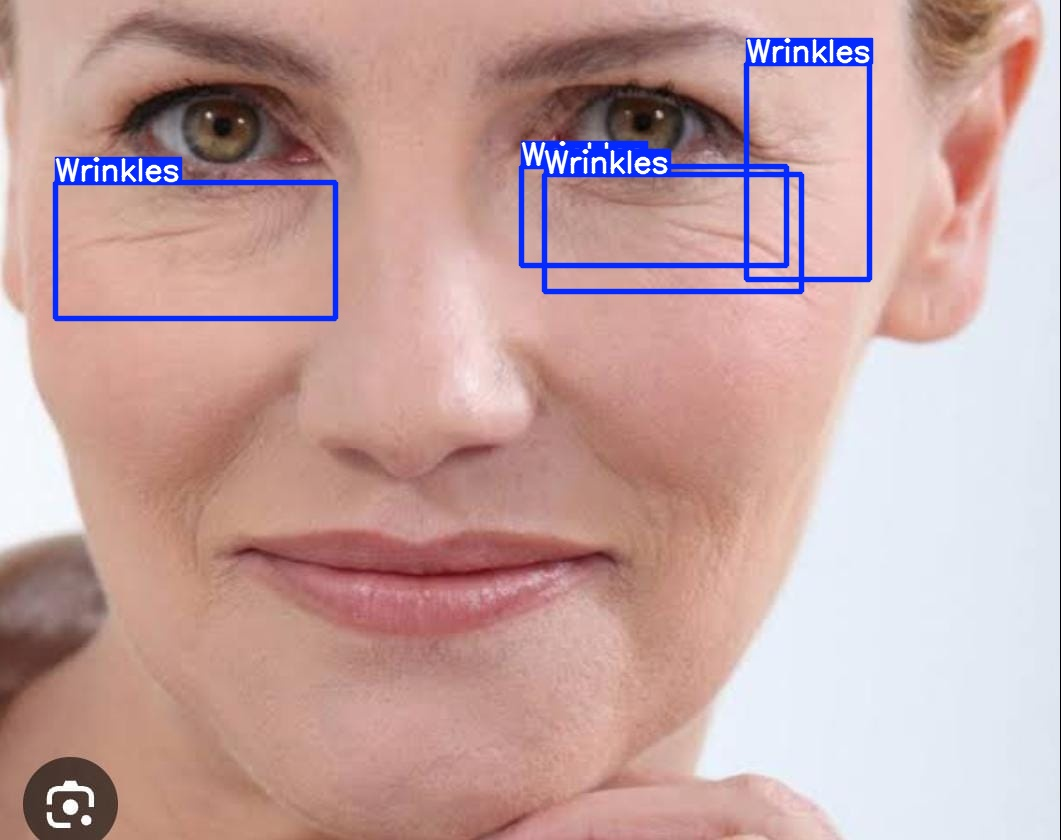

In [32]:
from IPython.display import Image, display

# التنبؤ على صورة
results = model.predict(
    source="/kaggle/input/aaaaaaaaaaaaa/WhatsApp Image 2025-06-10 at 18.59.43_87a47765.jpg",  # ← غيّري الاسم
    conf=0.2,
    save=True,
    show_conf=False 
)

# عرض الصورة المتوقعة
output_dir = results[0].save_dir
image_files = [f for f in os.listdir(output_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

if image_files:
    image_path = os.path.join(output_dir, image_files[0])
    display(Image(filename=image_path))
else:
    print("❌ لم يتم العثور على أي صورة.")


In [18]:
model.save("/kaggle/working/Wrinkles_yolov8.pt")

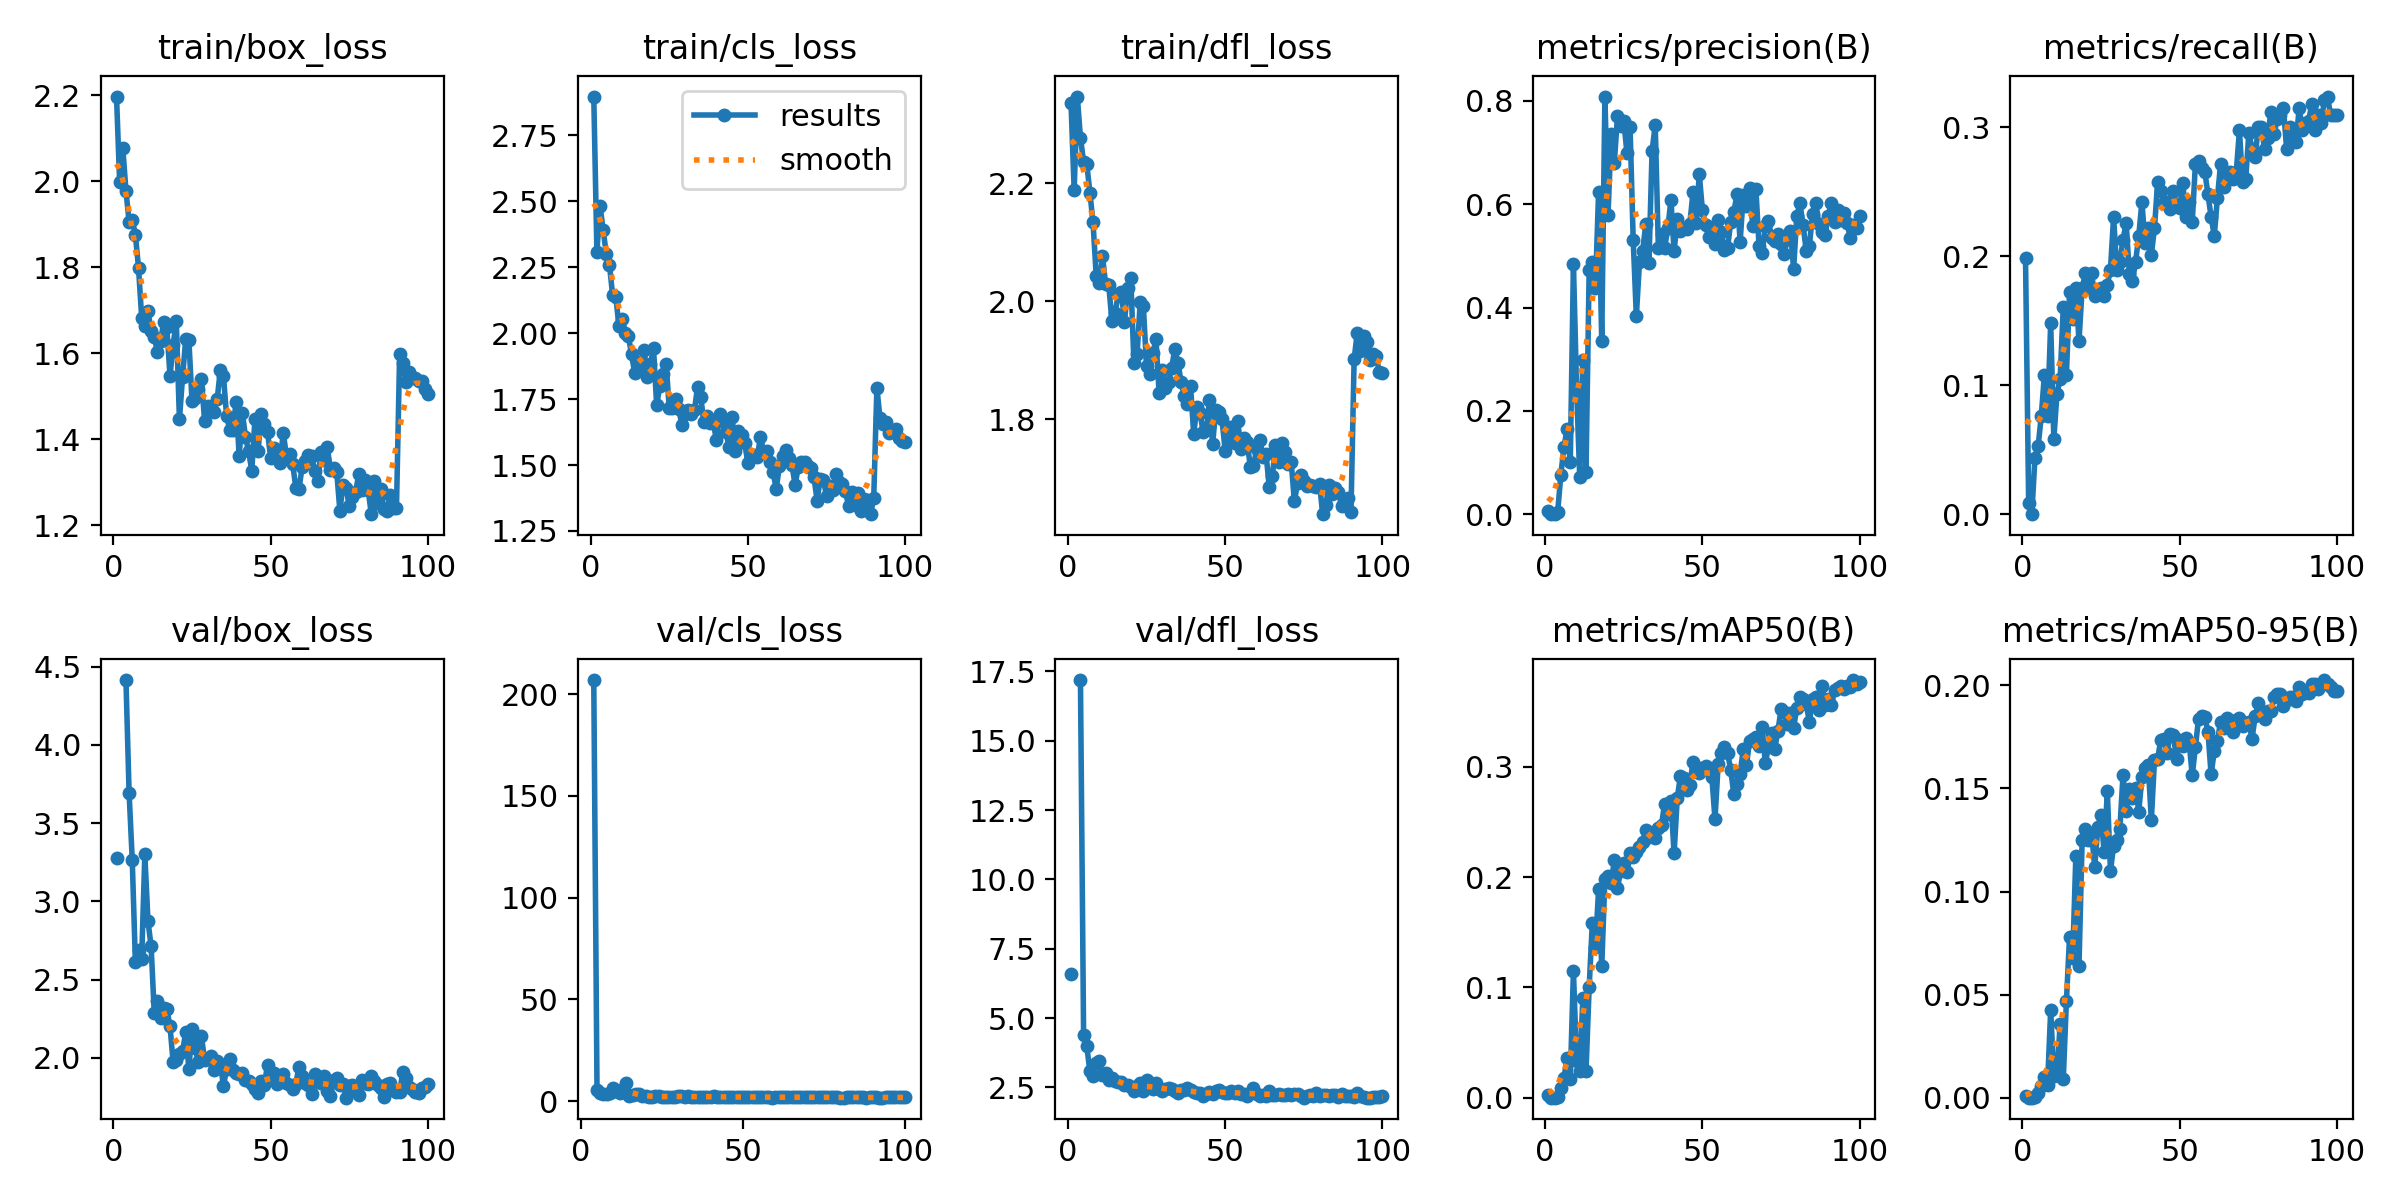

In [19]:
from IPython.display import Image, display

# Displaying the training and evaluation curves
results_path = "/kaggle/working/runs/detect/wrinkles_yolo_v2/results.png"
display(Image(filename=results_path))



0: 832x832 3 Wrinkless, 45.6ms
1: 832x832 1 Wrinkles, 45.6ms
2: 832x832 1 Wrinkles, 45.6ms
3: 832x832 1 Wrinkles, 45.6ms
4: 832x832 (no detections), 45.6ms
5: 832x832 1 Wrinkles, 45.6ms
6: 832x832 1 Wrinkles, 45.6ms
7: 832x832 1 Wrinkles, 45.6ms
8: 832x832 3 Wrinkless, 45.6ms
9: 832x832 1 Wrinkles, 45.6ms
10: 832x832 1 Wrinkles, 45.6ms
11: 832x832 (no detections), 45.6ms
12: 832x832 1 Wrinkles, 45.6ms
13: 832x832 1 Wrinkles, 45.6ms
14: 832x832 (no detections), 45.6ms
15: 832x832 (no detections), 45.6ms
16: 832x832 2 Wrinkless, 45.6ms
17: 832x832 4 Wrinkless, 45.6ms
18: 832x832 1 Wrinkles, 45.6ms
19: 832x832 3 Wrinkless, 45.6ms
20: 832x832 1 Wrinkles, 45.6ms
21: 832x832 1 Wrinkles, 45.6ms
22: 832x832 1 Wrinkles, 45.6ms
23: 832x832 (no detections), 45.6ms
24: 832x832 1 Wrinkles, 45.6ms
25: 832x832 (no detections), 45.6ms
26: 832x832 1 Wrinkles, 45.6ms
27: 832x832 (no detections), 45.6ms
28: 832x832 1 Wrinkles, 45.6ms
29: 832x832 3 Wrinkless, 45.6ms
30: 832x832 2 Wrinkless, 45.6ms
31: 83

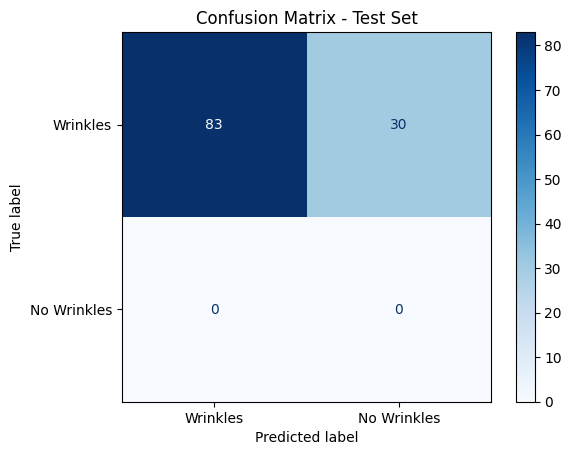

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/working/Wrinkles/test/labels")
image_files = list(Path("/kaggle/working/Wrinkles/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Wrinkles", "No Wrinkles"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()
